



# **QUESTION 1**

## **DATASET AND PROBLEM STATEMENT**

Ocular Disease Intelligent Recognition ([ODIR](https://odir2019.grand-challenge.org/Download/)) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

**BASED ON THE LEFT AND RIGHT EYE FUNDUS IMAGES, CLASSIFY THE PATIENT IN OR MORE OF THE ABOVE LABELS(MULTI-LABEL CLASSIFICATION PROBLEM)**

In [ ]:
import pandas as pd

data_df = pd.read_excel('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Training_Annotations(Updated)_V2.xlsx')
data_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
cd '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1'

/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1


In [ ]:
!7z x '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Training_Images.7z'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/Shared drives/Sha . DL_HOME_ASSIGNMENT_1/QUESTION_1/                                                                             1 file, 1128791935 bytes (1077 MiB)

Extracting archive: /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Training_Images.7z
--
Path = /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Training_Images.7z
Type = 7z
Physical Size = 1128791935
Headers Size = 77932
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 1 - ODIR-5K_Training_Dataset/0_left.jpg

In [ ]:
!7z x '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Testing_Images.7z'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/Shared drives/Sha . DL_HOME_ASSIGNMENT_1/QUESTION_1/                                                                             1 file, 171422243 bytes (164 MiB)

Extracting archive: /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Testing_Images.7z
--
Path = /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Testing_Images.7z
Type = 7z
Physical Size = 171422243
Headers Size = 17325
Method = Deflate
Solid = +
Blocks = 1

  0%      0% 5 - ODIR-5K_Testing_Images/1002_right.jpg

In [ ]:
for label in [ 'N', 'D', 'G','C', 'A', 'H', 'M', 'O']:
    print(label,data_df.groupby(label).count()['ID'][1])

N 1140
D 1128
G 215
C 212
A 164
H 103
M 174
O 979


**There is imabalance in the dataset**

## **DATA PREPROCESSING**

In [ ]:
TRAIN_DIR = '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Training_Dataset'
TEST_DIR = '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Testing_Images'

PREPROCESSED_TRAIN_DIR = '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/PREPROCESSED_TRAINING_IMAGES'
PREPROCESSED_TEST_DIR  = '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/PREPROCESSED_TEST_IMAGES'

### **RESIZE IMAGES  TO 100X100**

In [ ]:
import os
import cv2


def resize_images(directory,target_dir):
  for file in os.listdir(directory):
    if 'jpg' in file:
      image = cv2.imread(directory+"/"+file)
      image_resized = cv2.resize(image,(100,100))
      cv2.imwrite(target_dir+"/"+'resized_'+file,image_resized)


In [ ]:
from multiprocessing import Process
import multiprocessing

manager=multiprocessing.Manager()
p1=Process(target=resize_images,args = (TRAIN_DIR,PREPROCESSED_TRAIN_DIR))
p2=Process(target=resize_images,args = (TEST_DIR,PREPROCESSED_TEST_DIR))

p1.start()
p2.start()

p1.join()
p2.join()

### **IMAGE DATA NORMALIZATION**

In [ ]:
import cv2
import numpy as np

LEFT_IMAGES  = []
RIGHT_IMAGES = []

for i in range(data_df.shape[0]):
  left_image_name  = data_df['Left-Fundus'][i]
  right_image_name = data_df['Right-Fundus'][i]

  left_image = cv2.imread(PREPROCESSED_TRAIN_DIR+"/"+'resized_'+left_image_name).astype(float)
  left_image/=255.0
  LEFT_IMAGES.append(left_image)

  right_image = cv2.imread(PREPROCESSED_TRAIN_DIR+"/"+'resized_'+right_image_name).astype(float)
  right_image/=255.0
  RIGHT_IMAGES.append(right_image)

np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/LEFT_IMAGES.npy',np.array(LEFT_IMAGES))
np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/RIGHT_IMAGES.npy',np.array(RIGHT_IMAGES))

In [ ]:
import numpy
Y = data_df[['N','D','G','C','A','H','M','O']].values

X = np.array(list(zip(LEFT_IMAGES,RIGHT_IMAGES)))

In [ ]:
len(LEFT_IMAGES),len(RIGHT_IMAGES)

(3500, 3500)

In [ ]:
!ls -lrt '/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1'

total 2910645
drwx------ 2 root root       4096 Jul 11  2019  ODIR-5K_Training_Dataset
-r-------- 1 root root 1128791935 Jul 12  2019  ODIR-5K_Training_Images.7z
-r-------- 1 root root     268198 Jul 23  2019 'ODIR-5K_Training_Annotations(Updated)_V2.xlsx'
-r-------- 1 root root  171422243 Aug 20  2019  ODIR-5K_Testing_Images.7z
drwx------ 2 root root       4096 Oct 27 20:03  ODIR-5K_Testing_Images
drwx------ 2 root root       4096 Oct 30 12:59  PREPROCESSED_TEST_IMAGES
drwx------ 2 root root       4096 Oct 30 15:46  PREPROCESSED_TRAINING_IMAGES
-rw------- 1 root root  840000128 Oct 30 16:10  LEFT_IMAGES.npy
-rw------- 1 root root  840000128 Oct 30 16:10  RIGHT_IMAGES.npy


In [ ]:
import os
import cv2
TEST_LEFT_IMAGES  = []
TEST_RIGHT_IMAGES = []
TEST_IMAGE_IDS = []
image_names = os.listdir('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/ODIR-5K_Testing_Images')
image_names.sort()

i = 0
while i<1000:
  left_image_name = image_names[i]
  right_image_name = image_names[i+1]
  left_image = cv2.imread(PREPROCESSED_TEST_DIR+"/"+'resized_'+left_image_name).astype(float)
  left_image/=255.0
  TEST_LEFT_IMAGES.append(left_image)

  right_image = cv2.imread(PREPROCESSED_TEST_DIR+"/"+'resized_'+right_image_name).astype(float)
  right_image/=255.0
  TEST_RIGHT_IMAGES.append(right_image)

  TEST_IMAGE_IDS.append(left_image_name.split('_')[0])
  i+=2

np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_LEFT_IMAGES.npy',np.array(TEST_LEFT_IMAGES))
np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_RIGHT_IMAGES.npy',np.array(TEST_RIGHT_IMAGES))
np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_IMAGE_IDS.npy',np.array(TEST_IMAGE_IDS))

In [ ]:
len(image_names)

1000

In [ ]:
import numpy as np

TEST_LEFT_IMAGES = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_LEFT_IMAGES.npy')
TEST_RIGHT_IMAGES = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_RIGHT_IMAGES.npy')
TEST_IMAGE_IDS = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_IMAGE_IDS.npy')

### **TRAIN VALIDATION SPLIT**

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 1.3MB/s 


In [ ]:
!pip install arff

  Created wheel for arff: filename=arff-0.9-cp36-none-any.whl size=4970 sha256=f0b84e17d8a5b01c16af58d39eadbe5bd986a59adf6d07ff858ba95eeb26ffac
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [ ]:
from skmultilearn.model_selection import iterative_train_test_split

X_train, y_train, X_vak, y_val = iterative_train_test_split(X, Y, test_size = 0.1)

In [ ]:
X_train.shape,X_val.shape

((3152, 2, 100, 100, 3), (348, 2, 100, 100, 3))

In [ ]:
y_train.shape,y_test.shape

((3152, 8), (348, 8))

In [ ]:
# import numpy as np

# np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/X_TRAIN.npy',X_train)
# np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/X_TEST.npy',X_test)

# np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/Y_TRAIN.npy',y_train)
# np.save('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/Y_TEST.npy',y_test)

In [ ]:
import numpy as np

X_train = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/X_TRAIN.npy')
X_val  = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/X_TEST.npy')

y_train = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/Y_TRAIN.npy')
y_val  = np.load('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/Y_TEST.npy')

In [ ]:
X_train_left = X_train[:,0]
X_train_right = X_train[:,1]

In [ ]:
X_train_left.shape,X_train_right.shape

((3152, 100, 100, 3), (3152, 100, 100, 3))

In [ ]:
X_val_left = X_val[:,0]
X_val_right = X_val[:,1]

In [ ]:
X_val_left.shape,X_val_right.shape

((348, 100, 100, 3), (348, 100, 100, 3))

## **TEST SUBMISSION** 

In [ ]:
import pandas as pd
def create_submission_file(image_ids,pred_probs,filename):
  dataframe = pd.DataFrame(data = list(zip(image_ids,pred_probs[:,0],
                                           pred_probs[:,1],pred_probs[:,2],
                                           pred_probs[:,3],pred_probs[:,4],
                                           pred_probs[:,5],pred_probs[:,6],
                                           pred_probs[:,7],)),columns=['ID','N','D','G','C','A','H','M','O'])
  dataframe.to_csv(filename,index = None)
  


## **PERFORMANCE METRIC: EXACT MATCH**

In [ ]:
def exact_match(actuals, predictions):
    predictions = tensorflow.math.greater_equal(predictions,tensorflow.constant([0.5]))
    actuals = tensorflow.cast(actuals,bool)
    result = tensorflow.reduce_all(tensorflow.equal(actuals, predictions),axis = 1)
    not_eq = tensorflow.cast(tensorflow.reduce_sum(tensorflow.cast(result, tensorflow.int32)),tensorflow.float32)
    return tensorflow.math.divide_no_nan(not_eq, tensorflow.cast(len(result),tensorflow.float32))

In [ ]:
def get_predicted_labels(prediction_prob):
  pred_labels = []
  for row_prob in prediction_prob:
    label = np.zeros(8)
    for i in range(8):
      if row_prob[i] >= 0.5:
        label[i] = 1
    pred_labels.append(label)
  return np.array(pred_labels)

def compute_exact_match(actual,prediction_prob):
  exact_matches = 0
  pred_labels = get_predicted_labels(prediction_prob)
  for i in range(actual.shape[0]):
    if all(actual[i] == pred_labels[i]):
      exact_matches+=1
  print(exact_matches/actual.shape[0])


## **MODEL 1**
3 Layer CNN for both image inputs

In [ ]:
import tensorflow
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Input,Concatenate,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

tensorflow.keras.backend.clear_session()

left_image_input = Input((100,100,3))
right_image_input = Input((100,100,3))

conv_1_left_output = Conv2D(16, (3, 3), activation='relu')(left_image_input)
pool_1_left_output = MaxPooling2D((2, 2))(conv_1_left_output)

conv_2_left_output = Conv2D(32, (3, 3), activation='relu')(pool_1_left_output)
pool_2_left_output = MaxPooling2D((2, 2))(conv_2_left_output)

conv_3_left_output = Conv2D(64, (3, 3), activation='relu')(pool_2_left_output)
pool_3_left_output = MaxPooling2D((2, 2))(conv_3_left_output)

flattened_left_output = Flatten()(pool_3_left_output)

conv_1_right_output = Conv2D(16, (3, 3), activation='relu')(right_image_input)
pool_1_right_output = MaxPooling2D((2, 2))(conv_1_right_output)

conv_2_right_output = Conv2D(32, (3, 3), activation='relu')(pool_1_right_output)
pool_2_right_output = MaxPooling2D((2, 2))(conv_2_right_output)

conv_3_right_output = Conv2D(64, (3, 3), activation='relu')(pool_2_right_output)
pool_3_right_output = MaxPooling2D((2, 2))(conv_3_right_output)

flattened_right_output = Flatten()(pool_3_right_output)

final_flattened_output = Concatenate()([flattened_left_output,flattened_right_output])

dense_1_output = Dense(512, activation='relu')(final_flattened_output)
dense_2_output = Dense(256, activation='relu')(dense_1_output)

# MULTILABEL CLASSIFICATION 8 LABELS
final_output = Dense(8,activation='sigmoid')(dense_2_output)

model = Model(inputs=[left_image_input,right_image_input],outputs = final_output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 98, 98, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 98, 98, 16)   448         input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(model)

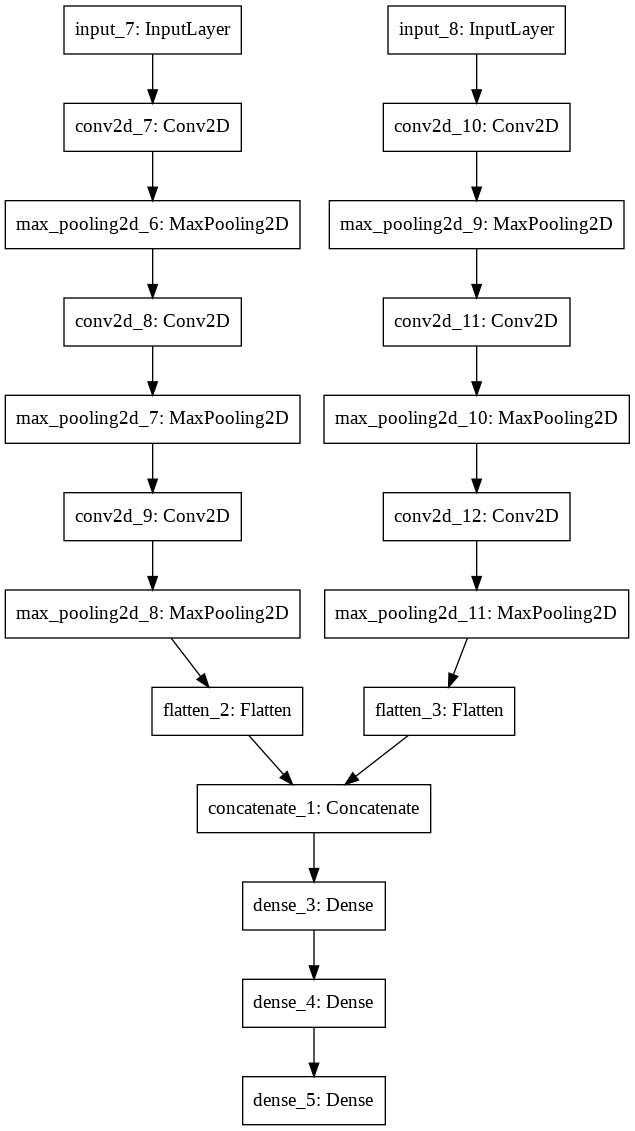

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr = 0.001),loss = 'binary_crossentropy',metrics=[exact_match])

In [ ]:
model_ckpt = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_1.h5', 
                                                        monitor='val_exact_match', verbose=1, save_best_only=True,
                                                        save_weights_only=True, mode='max', save_freq='epoch')

model.fit((X_train_left,X_train_right),y_train,
          validation_data = ((X_val_left,X_val_right),y_val),
          batch_size=32,epochs = 20,callbacks = [model_ckpt])

Epoch 1/20
99/99 [==============================] - ETA: 0s - loss: 0.0960 - exact_match: 0.7620
Epoch 00001: val_exact_match improved from -inf to 0.19115, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_1.h5
99/99 [==============================] - 55s 552ms/step - loss: 0.0960 - exact_match: 0.7620 - val_loss: 0.6256 - val_exact_match: 0.1912
Epoch 2/20
99/99 [==============================] - ETA: 0s - loss: 0.0873 - exact_match: 0.7784
Epoch 00002: val_exact_match improved from 0.19115 to 0.20698, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_1.h5
99/99 [==============================] - 53s 540ms/step - loss: 0.0873 - exact_match: 0.7784 - val_loss: 0.6755 - val_exact_match: 0.2070
Epoch 3/20
99/99 [==============================] - ETA: 0s - loss: 0.0679 - exact_match: 0.8270
Epoch 00003: val_exact_match improved from 0.20698 to 0.24756, saving model to /content/drive/Shared drives/Sh

In [ ]:
model.load_weights('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_1.h5')

### **TRAIN**

In [ ]:
pred_label_probabilities = model.predict((X_train_left,X_train_right))
compute_exact_match(y_train,pred_label_probabilities)

0.8816624365482234


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, get_predicted_labels(pred_label_probabilities), average='weighted')

0.9329964635395155

### **VALIDATION**

In [ ]:
pred_label_probabilities = model.predict((X_val_left,X_val_right))
compute_exact_match(y_val,pred_label_probabilities)

0.2471264367816092


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val, get_predicted_labels(pred_label_probabilities), average='weighted')

0.3563307374353518

### **TEST**

**Performance Evaluation**

Submissions are scored based on three metrics: kappa score,  F-1 score and AUC value.  The threshold is 0.5. A final score will be computed as the average of the above metrics.

In [ ]:
test_pred_prob = model.predict((np.array(TEST_LEFT_IMAGES),np.array(TEST_RIGHT_IMAGES)))

In [ ]:
test_pred_prob.shape

(500, 8)

In [ ]:
create_submission_file(TEST_IMAGE_IDS,test_pred_prob,'/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_SUBMISSION_MODEL_1.csv')

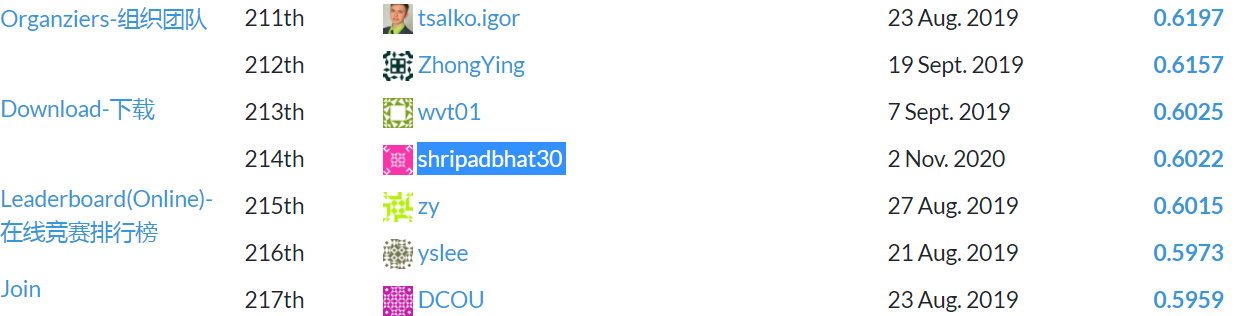

## **MODEL 2**
6 Layer CNN  with 1 skip connection using concatenation and dropout regularization

In [ ]:
import tensorflow
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Input,Concatenate,MaxPooling2D,Add,BatchNormalization
from tensorflow.keras.models import Model

tensorflow.keras.backend.clear_session()

left_image_input = Input((100,100,3))
right_image_input = Input((100,100,3))

conv_1_left_output = Conv2D(8, (3, 3), activation='relu',padding='same')(left_image_input)
conv_1_left_output = Dropout(0.3)(conv_1_left_output)
conv_2_left_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_1_left_output)
conv_2_left_output = Dropout(0.3)(conv_2_left_output)
conv_3_left_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_2_left_output)
conv_3_left_output = Dropout(0.3)(conv_3_left_output)

conv_3_left_output = Concatenate()([conv_3_left_output,conv_1_left_output])

conv_4_left_output = Conv2D(16, (3, 3), activation='relu')(conv_3_left_output)
conv_4_left_output = Dropout(0.3)(conv_4_left_output)
conv_5_left_output = Conv2D(16, (3, 3), activation='relu')(conv_4_left_output)
conv_5_left_output = Dropout(0.3)(conv_5_left_output)
conv_6_left_output = Conv2D(16, (3, 3), activation='relu')(conv_5_left_output)
conv_6_left_output = MaxPooling2D((2, 2))(conv_6_left_output)

flattened_left_output = Flatten()(conv_6_left_output)

conv_1_right_output = Conv2D(8, (3, 3), activation='relu',padding='same')(right_image_input)
conv_1_right_output = Dropout(0.3)(conv_1_right_output)
conv_2_right_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_1_right_output)
conv_2_right_output = Dropout(0.3)(conv_2_right_output)
conv_3_right_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_2_right_output)
conv_3_right_output = Dropout(0.3)(conv_3_right_output)

conv_3_right_output = Concatenate()([conv_3_right_output,conv_1_right_output])

conv_4_right_output = Conv2D(16, (3, 3), activation='relu')(conv_3_right_output)
conv_4_right_output = Dropout(0.3)(conv_4_right_output)
conv_5_right_output = Conv2D(16, (3, 3), activation='relu')(conv_4_right_output)
conv_5_right_output = Dropout(0.3)(conv_5_right_output)
conv_6_right_output = Conv2D(16, (3, 3), activation='relu')(conv_5_right_output)
conv_6_right_output = MaxPooling2D((2, 2))(conv_6_right_output)

flattened_right_output = Flatten()(conv_6_right_output)

final_flattened_output = Concatenate()([flattened_left_output,flattened_right_output])

dense_1_output = Dense(512, activation='relu')(final_flattened_output)
dense_2_output = Dense(256, activation='relu')(dense_1_output)

# MULTILABEL CLASSIFICATION 8 LABELS
final_output = Dense(8,activation='sigmoid')(dense_2_output)

model_2 = Model(inputs=[left_image_input,right_image_input],outputs = final_output)
model_2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 100, 100, 8)  224         input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
tensorflow.keras.utils.plot_model(model_2)

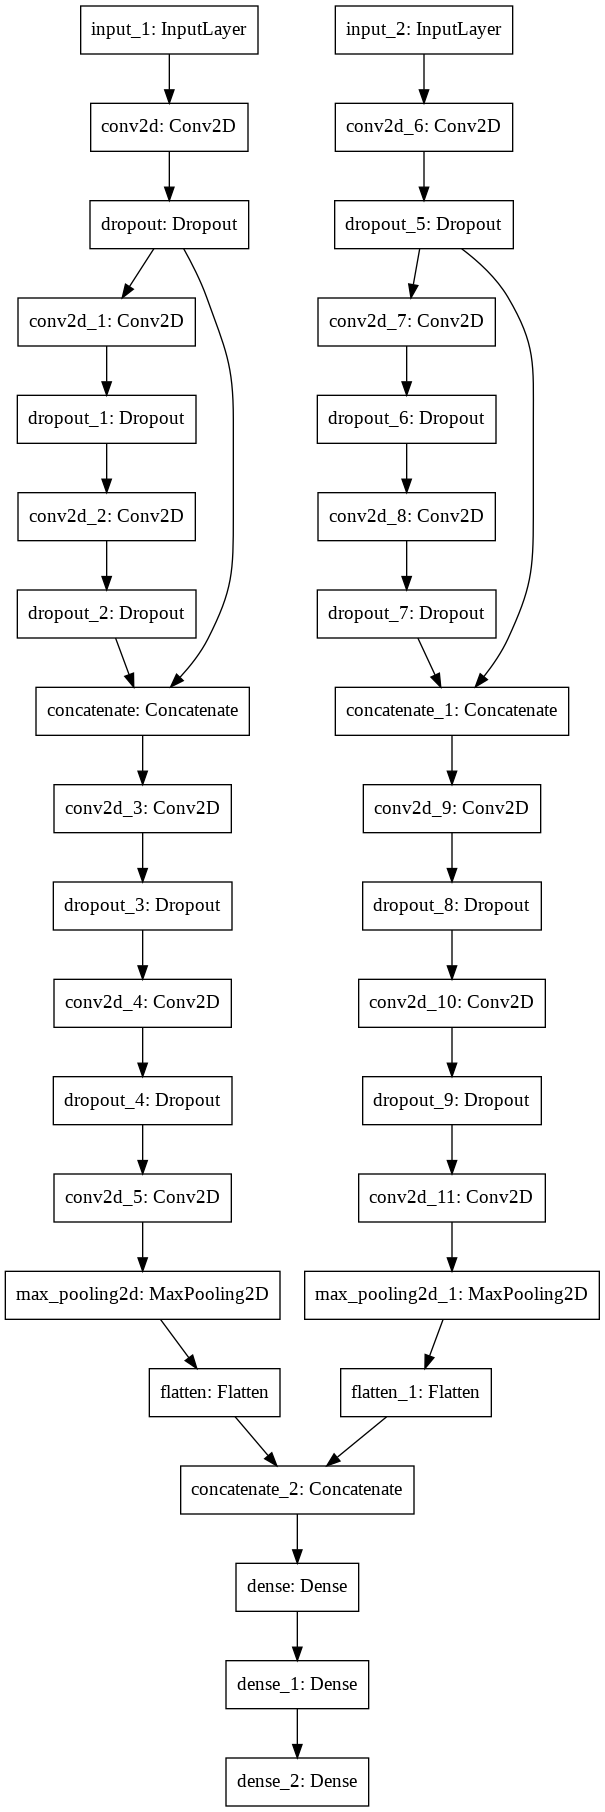

In [ ]:
from tensorflow.keras.optimizers import Adam

model_2.compile(optimizer=Adam(lr = 0.001),loss = 'binary_crossentropy',metrics=[exact_match])

In [ ]:
model_ckpt = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_2.h5', 
                                                        monitor='val_exact_match', verbose=1, save_best_only=True,
                                                        save_weights_only=True, mode='max', save_freq='epoch')

model_2.fit((X_train_left,X_train_right),y_train,
             validation_data = ((X_val_left,X_val_right),y_val),
             batch_size=32,epochs = 40,callbacks = [model_ckpt])

Epoch 1/40
99/99 [==============================] - ETA: 0s - loss: 0.5092 - exact_match: 0.0148
Epoch 00001: val_exact_match improved from -inf to 0.00000, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_2.h5
99/99 [==============================] - 236s 2s/step - loss: 0.5092 - exact_match: 0.0148 - val_loss: 0.4290 - val_exact_match: 0.0000e+00
Epoch 2/40
99/99 [==============================] - ETA: 0s - loss: 0.3518 - exact_match: 0.0155
Epoch 00002: val_exact_match improved from 0.00000 to 0.04261, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_2.h5
99/99 [==============================] - 234s 2s/step - loss: 0.3518 - exact_match: 0.0155 - val_loss: 0.4101 - val_exact_match: 0.0426
Epoch 3/40
99/99 [==============================] - ETA: 0s - loss: 0.3466 - exact_match: 0.0297
Epoch 00003: val_exact_match did not improve from 0.04261
99/99 [==============================] - 230s 2s/ste

In [ ]:
model_2.load_weights('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_2.h5')

### **TRAIN**

In [ ]:
pred_label_probabilities = model_2.predict((X_train_left,X_train_right))
compute_exact_match(y_train,pred_label_probabilities)

0.9942893401015228


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, get_predicted_labels(pred_label_probabilities), average='weighted')

0.9974345042784366

### **VALIDATION**

In [ ]:
pred_label_probabilities = model_2.predict((X_val_left,X_val_right))
compute_exact_match(y_val,pred_label_probabilities)

0.28160919540229884


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val, get_predicted_labels(pred_label_probabilities), average='weighted')

0.38212441608588277

### **TEST**

In [ ]:
test_pred_prob = model_2.predict((np.array(TEST_LEFT_IMAGES),np.array(TEST_RIGHT_IMAGES)))

In [ ]:
test_pred_prob.shape

(500, 8)

In [ ]:
create_submission_file(TEST_IMAGE_IDS,test_pred_prob,'/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_SUBMISSION_MODEL_2.csv')

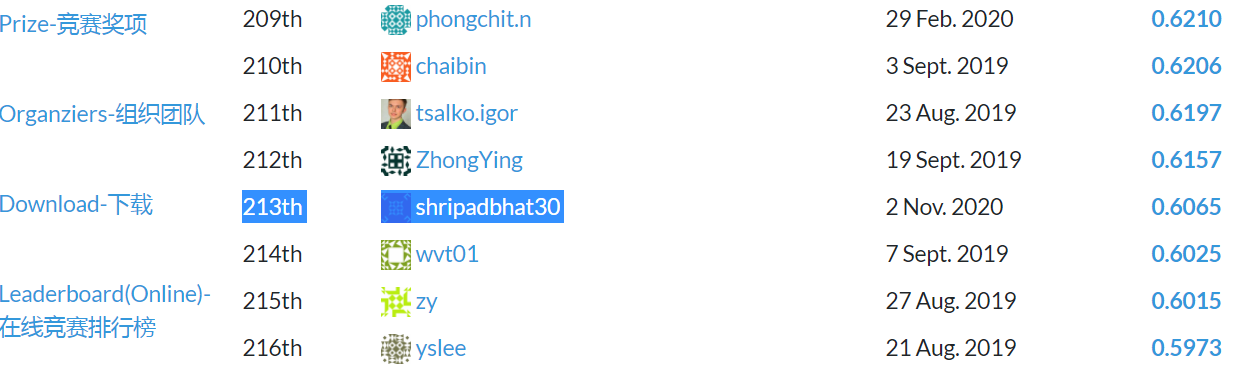

## **MODEL 3**

6 layer CNN  with 2 skip connections using Addition

In [ ]:
import tensorflow
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Input,Concatenate,MaxPooling2D,Add,BatchNormalization
from tensorflow.keras.models import Model

tensorflow.keras.backend.clear_session()

left_image_input = Input((100,100,3))
right_image_input = Input((100,100,3))

conv_1_left_output = Conv2D(4, (3, 3), activation='relu',padding='same')(left_image_input)
conv_1_left_output = Dropout(0.3)(conv_1_left_output)

conv_2_left_output = Conv2D(4, (3, 3), activation='relu',padding='same')(conv_1_left_output)
conv_2_left_output = Dropout(0.3)(conv_2_left_output)

# skip connection 1
conv_2_left_output = Add()([conv_1_left_output,conv_2_left_output])

conv_3_left_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_2_left_output)
conv_3_left_output = Dropout(0.3)(conv_3_left_output)
conv_4_left_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_3_left_output)
conv_4_left_output = Dropout(0.3)(conv_4_left_output)

# skip connection 2
conv_4_left_output = Add()([conv_3_left_output,conv_4_left_output])

conv_5_left_output = Conv2D(16, (3, 3), activation='relu',padding='same')(conv_4_left_output)
conv_5_left_output = Dropout(0.3)(conv_5_left_output)
conv_6_left_output = Conv2D(16, (3, 3), activation='relu',padding='same')(conv_5_left_output)
conv_6_left_output = Dropout(0.3)(conv_6_left_output)

conv_6_left_output = MaxPooling2D((2, 2))(conv_6_left_output)


flattened_left_output = Flatten()(conv_6_left_output)

# right image
conv_1_right_output = Conv2D(4, (3, 3), activation='relu',padding='same')(right_image_input)
conv_1_right_output = Dropout(0.3)(conv_1_right_output)

conv_2_right_output = Conv2D(4, (3, 3), activation='relu',padding='same')(conv_1_right_output)
conv_2_right_output = Dropout(0.3)(conv_2_right_output)

# skip connection 1
conv_2_right_output = Add()([conv_1_right_output,conv_2_right_output])

conv_3_right_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_2_right_output)
conv_3_right_output = Dropout(0.3)(conv_3_right_output)
conv_4_right_output = Conv2D(8, (3, 3), activation='relu',padding='same')(conv_3_right_output)
conv_4_right_output = Dropout(0.3)(conv_4_right_output)

# skip connection 2
conv_4_right_output = Add()([conv_3_right_output,conv_4_right_output])

conv_5_right_output = Conv2D(16, (3, 3), activation='relu',padding='same')(conv_4_right_output)
conv_5_right_output = Dropout(0.3)(conv_5_right_output)
conv_6_right_output = Conv2D(16, (3, 3), activation='relu',padding='same')(conv_5_right_output)
conv_6_right_output = Dropout(0.3)(conv_6_right_output)

conv_6_right_output = MaxPooling2D((2, 2))(conv_6_right_output)

flattened_right_output = Flatten()(conv_6_right_output)

final_flattened_output = Concatenate()([flattened_left_output,flattened_right_output])

dense_1_output = Dense(512, activation='relu')(final_flattened_output)
dense_2_output = Dense(256, activation='relu')(dense_1_output)

# MULTILABEL CLASSIFICATION 8 LABELS
final_output = Dense(8,activation='sigmoid')(dense_2_output)

model_3 = Model(inputs=[left_image_input,right_image_input],outputs = final_output)
model_3.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 4)  112         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 100, 100, 4)  112         input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
tensorflow.keras.utils.plot_model(model_3)

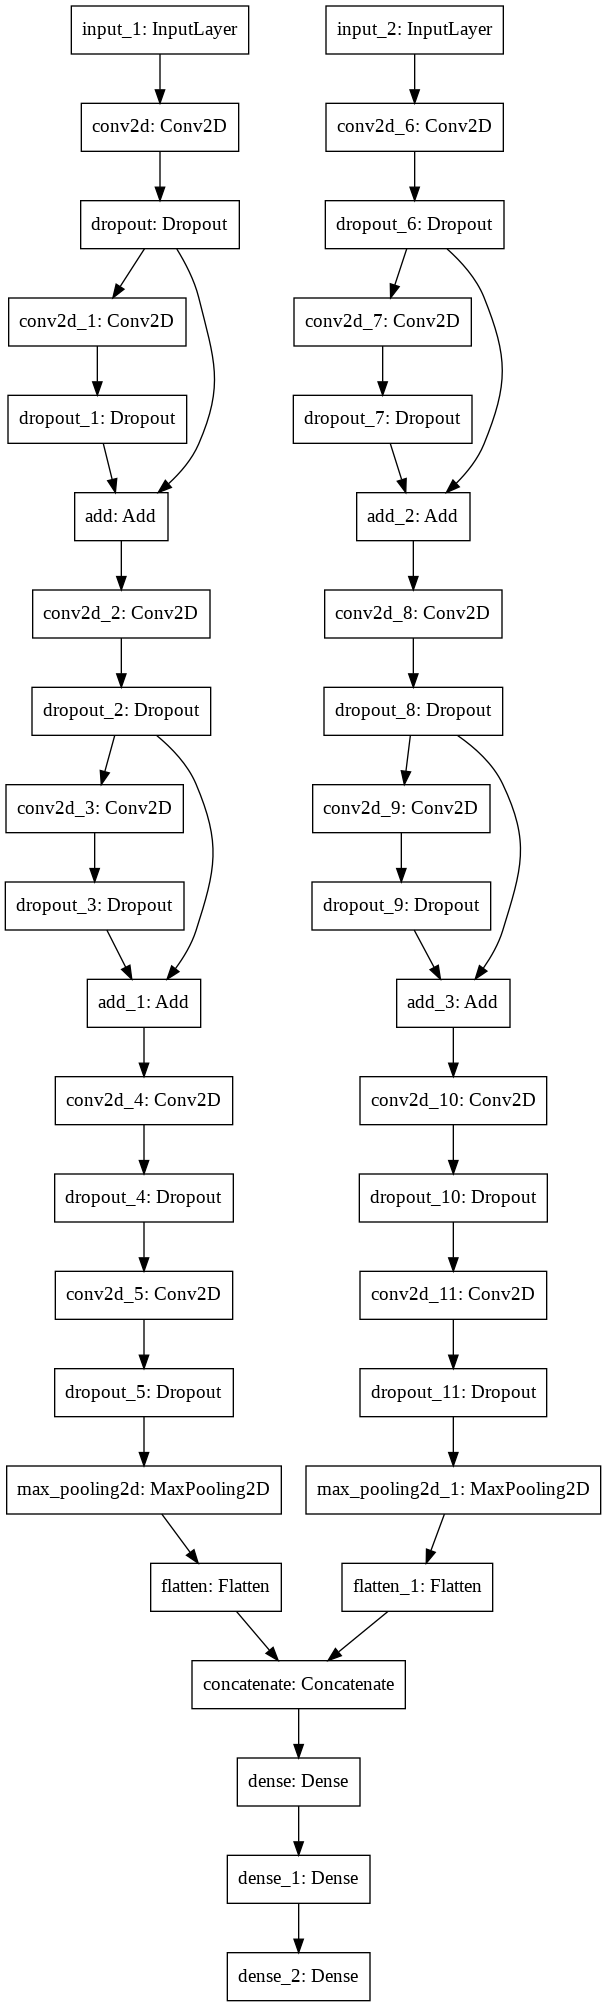

In [ ]:
from tensorflow.keras.optimizers import Adam

model_3.compile(optimizer=Adam(lr = 0.001),loss = 'binary_crossentropy',metrics=[exact_match])

In [ ]:
model_ckpt = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_3.h5', 
                                                        monitor='val_exact_match', verbose=1, save_best_only=True,
                                                        save_weights_only=True, mode='max', save_freq='epoch')

model_3.fit((X_train_left,X_train_right),y_train,
             validation_data = ((X_val_left,X_val_right),y_val),
             batch_size=32,epochs = 100,callbacks = [model_ckpt])

Epoch 1/100
99/99 [==============================] - ETA: 0s - loss: 0.7052 - exact_match: 0.0480
Epoch 00001: val_exact_match improved from -inf to 0.00000, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_3.h5
99/99 [==============================] - 143s 1s/step - loss: 0.7052 - exact_match: 0.0480 - val_loss: 0.6371 - val_exact_match: 0.0000e+00
Epoch 2/100
99/99 [==============================] - ETA: 0s - loss: 0.3585 - exact_match: 0.0152
Epoch 00002: val_exact_match did not improve from 0.00000
99/99 [==============================] - 136s 1s/step - loss: 0.3585 - exact_match: 0.0152 - val_loss: 0.5175 - val_exact_match: 0.0000e+00
Epoch 3/100
99/99 [==============================] - ETA: 0s - loss: 0.3512 - exact_match: 0.0325
Epoch 00003: val_exact_match improved from 0.00000 to 0.00284, saving model to /content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_3.h5
99/99 [==============================] - 137s

In [ ]:
model_3.load_weights('/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/model_3.h5')

### **TRAIN**

In [ ]:
pred_label_probabilities = model_3.predict((X_train_left,X_train_right))
compute_exact_match(y_train,pred_label_probabilities)

0.9746192893401016


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, get_predicted_labels(pred_label_probabilities), average='weighted')

0.9869810509494455

### **VALIDATION**

In [ ]:
pred_label_probabilities = model_3.predict((X_val_left,X_val_right))
compute_exact_match(y_val,pred_label_probabilities)

0.29310344827586204


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val, get_predicted_labels(pred_label_probabilities), average='weighted')

0.3634382857399946

### **TEST**

In [ ]:
test_pred_prob = model_3.predict((TEST_LEFT_IMAGES,TEST_RIGHT_IMAGES))

In [ ]:
test_pred_prob.shape

(500, 8)

In [ ]:
create_submission_file(TEST_IMAGE_IDS,test_pred_prob,'/content/drive/Shared drives/Shared Data/DL_HOME_ASSIGNMENT_1/QUESTION_1/TEST_SUBMISSION_MODEL_3.csv')

{
  "Score": {
    "kappa": 0.20826686051347076,
    "AUC_vlaue": 0.7291603215603398,
    "f-1_score": 0.81675,
    "Final_Score": 0.5847257273579368
  }
}